In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import *

## Load data

First, store the information of the four simulations into lists and dictionaries. 

In [2]:
mlist = ['KPP-CVMix', 'GLS-C01A']
flist = ['filtered', 'unfiltered']
argo_label = '8'
casenames = []
labels = {}
for mtag in mlist:
    for ftag in flist:
        casename = 'argo{}_{}_{}'.format(argo_label, ftag, mtag)
        print(casename)
        casenames.append(casename)
        label = 'a{}{}_{}'.format(argo_label, ftag[0], mtag)
        print(label)
        labels[casename] = label
        
colors = {
    casenames[0]: 'tab:blue',
    casenames[1]: 'tab:blue',
    casenames[2]: 'tab:red',
    casenames[3]: 'tab:red',
    }

linestyles = {
    casenames[0]: '-',
    casenames[1]: '--',
    casenames[2]: '-',
    casenames[3]: '--',
    }

casedir = '../gotm/run/Variable_forcing_x5'
save_fig = False

argo8_filtered_KPP-CVMix
a8f_KPP-CVMix
argo8_unfiltered_KPP-CVMix
a8u_KPP-CVMix
argo8_filtered_GLS-C01A
a8f_GLS-C01A
argo8_unfiltered_GLS-C01A
a8u_GLS-C01A


Load data for the four simulations into a dictionary.

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sim = Simulation(path=casedir+'/'+case)
    sims[case] = sim
    dataset[case] = sim.load_data()

## Figure 1


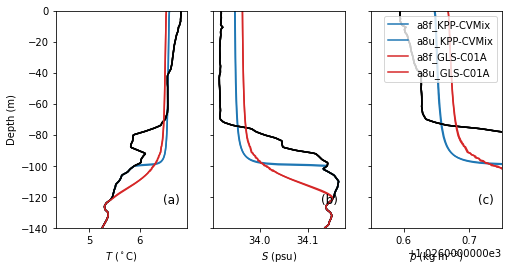

In [4]:
fig, axarr = plt.subplots(1,3, sharey='row')
fig.set_size_inches([8,4])
for case in casenames:
    data = dataset[case]
    data.temp[:,0,0,0].plot(y='z', ax=axarr[0], color='k')
    data.salt[:,0,0,0].plot(y='z', ax=axarr[1], color='k')
    data.rho[:,0,0,0].plot(y='z', ax=axarr[2], color='k')
    data.temp[:,-1,0,0].plot(y='z', ax=axarr[0], color=colors[case])
    data.salt[:,-1,0,0].plot(y='z', ax=axarr[1], color=colors[case])
    data.rho[:,-1,0,0].plot(y='z', ax=axarr[2], color=colors[case], label=labels[case])

for i in np.arange(3):
    axarr[i].set_title('') 
    axarr[i].set_ylabel('') 
    
axarr[0].set_ylim([-140,0])
# axarr[0].set_xlim([8.8, 9.9])
axarr[0].set_ylabel('Depth (m)')
axarr[0].set_xlabel('$T$ ($^\circ$C)')
axarr[1].set_xlabel('$S$ (psu)')
# axarr[1].set_xlim([33.87,33.94])
axarr[2].set_xlabel('$\\rho$ (kg m$^{-3}$)')
axarr[2].set_xlim([1026.55,1026.75])
axarr[2].ticklabel_format(axis="x", style="sci", scilimits=(-2,2))

axarr[2].legend(loc='upper right')

for i, ax in enumerate(axarr):
    ax.text(0.82, 0.1, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes,
            fontsize=12, va='bottom')

if save_fig:
    plt.tight_layout()
    figname = 'variable_forcing_pfl_{}.pdf'.format(argo_label)
    fig.savefig(figname, dpi=300)

## Figure 2

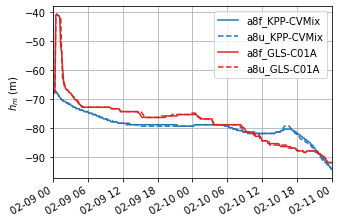

In [5]:
fig = plt.figure(figsize=[5,3.5])
for case in casenames:
    data = dataset[case]
    time = data.time
#     NN = data.NN[:,:,0,0]
#     mld = get_bld_maxNN(NN)
#     temp = data.temp
#     mld = -get_mld_deltaT(temp[:,:,0,0])
    rho = data.rho
    mld = -get_mld_deltaR(rho[:,:,0,0])
    plt.plot(time, mld.values, color=colors[case], linestyle=linestyles[case], label=labels[case])
#     plt.scatter(hours, mld.values, s=10, color=colors[case], label=labels[case])
plt.ylabel('$h_m$ (m)')
plt.xlabel('')
plt.xlim([time[0], time[-1]])
# plt.ylim([0,35])
# plt.legend(loc='lower left')
plt.legend(loc='upper right')
plt.grid()
fig.autofmt_xdate()
if save_fig:
    plt.tight_layout()
    figname = 'variable_forcing_ts_{}.pdf'.format(argo_label)
    fig.savefig(figname, dpi=300)

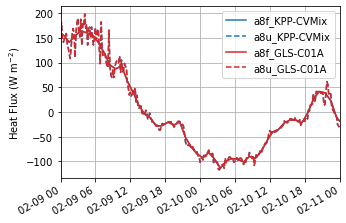

In [6]:
fig = plt.figure(figsize=[5,3.5])
for case in casenames:
    data = dataset[case]
    time = data.time
    heat = data.heat[:,0,0]
    plt.plot(time, heat.values, color=colors[case], linestyle=linestyles[case], label=labels[case])
#     plt.scatter(hours, mld.values, s=10, color=colors[case], label=labels[case])
plt.ylabel('Heat Flux (W m$^{-2}$)')
plt.xlabel('')
plt.xlim([time[0], time[-1]])
# plt.ylim([0,35])
plt.legend(loc='upper right')
plt.grid()
fig.autofmt_xdate()

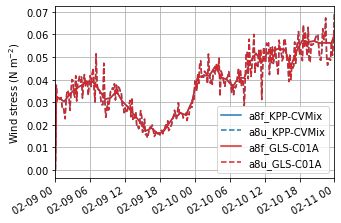

In [7]:
fig = plt.figure(figsize=[5,3.5])
for case in casenames:
    data = dataset[case]
    time = data.time
    tau= data.u_taus[:,0,0]
    plt.plot(time, tau.values, color=colors[case], linestyle=linestyles[case], label=labels[case])
#     plt.scatter(hours, mld.values, s=10, color=colors[case], label=labels[case])
plt.ylabel('Wind stress (N m$^{-2}$)')
plt.xlabel('')
plt.xlim([time[0], time[-1]])
# plt.ylim([0,35])
plt.legend(loc='lower right')
plt.grid()
fig.autofmt_xdate()

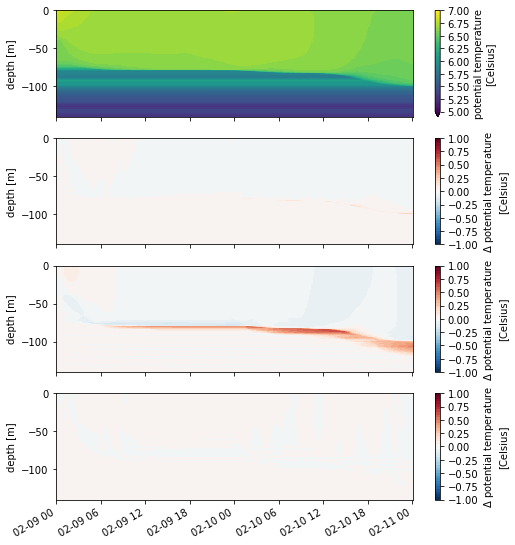

In [8]:
fig, axarr = plt.subplots(4, sharex='col')
fig.set_size_inches(8, 9)
levels = np.linspace(5, 7, 41)
levels_diff = np.linspace(-1, 1, 41)
for i, case in enumerate(casenames):
    data = dataset[case]
    time = data.time
    if i == 0:
        data.temp.plot(ax=axarr[i], levels=levels)
    else:
        diff = data.temp - data0.temp
        diff.attrs['long_name'] = '$\Delta$ '+ data0.temp.attrs['long_name']
        diff.attrs['units'] = data0.temp.attrs['units']
        diff.plot(ax=axarr[i], levels=levels_diff)
#         axarr[i].set_title(labels[i]+' $-$ '+labels[0])
    axarr[i].set_ylim([-140,0])
    axarr[i].set_title('')
    axarr[i].set_xlabel('')
    data0 = data